In [4]:
using Pkg
Pkg.activate("D:\\Science\\Code\\Julia\\envr")

  Activating project at `D:\Science\Code\Julia\envr`


In [5]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [153]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [161]:
t = 1000.0
tt = 500.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [162]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
α = 1.15; U0 = 0.3;
xthr = 0.9; ythr = 0.4
ΔU0 = 0.4
I0 = -1.5090

-1.509

In [163]:
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [0.5287662926292962
        0.9611190233149197
        0.41838101329795496]

ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.528766, 0.961119, 0.418381]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, 0.9, …, 0.3, 0.4, 0.4375, -1.509]

In [164]:
I0range = range( -1.5094, -1.5115, length = 5000 )

idx_control_parameter = 11

idx_fix = 2; fixed_value = 0.915 # idx_fix  = 2; fixed_value = 0.915
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-11, atol = 1e-11);

In [165]:
length(I0range)

5000

In [166]:
idx_save = 1
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.5094
parameter = -1.5094004200840168
parameter = -1.5094008401680337
parameter = -1.5094012602520503
parameter = -1.5094016803360673
parameter = -1.509402100420084
parameter = -1.5094025205041008
parameter = -1.5094029405881175
parameter = -1.5094033606721344
parameter = -1.5094037807561513
parameter = -1.509404200840168
parameter = -1.509404620924185
parameter = -1.5094050410082016
parameter = -1.5094054610922185
parameter = -1.5094058811762352
parameter = -1.509406301260252
parameter = -1.5094067213442688
parameter = -1.5094071414282857
parameter = -1.5094075615123024
parameter = -1.5094079815963193
parameter = -1.509408401680336
parameter = -1.5094088217643529
parameter = -1.5094092418483698
parameter = -1.5094096619323865
parameter = -1.5094100820164034
parameter = -1.50941050210042
parameter = -1.509410922184437
parameter = -1.5094113422684536
parameter = -1.5094117623524705
parameter = -1.5094121824364872
parameter = -1.5094126025205041
parameter = -1.5094130226045

parameter = -1.5095088017603522
parameter = -1.5095092218443689
parameter = -1.5095096419283858
parameter = -1.5095100620124025
parameter = -1.5095104820964194
parameter = -1.509510902180436
parameter = -1.509511322264453
parameter = -1.5095117423484696
parameter = -1.5095121624324865
parameter = -1.5095125825165032
parameter = -1.5095130026005201
parameter = -1.5095134226845368
parameter = -1.5095138427685537
parameter = -1.5095142628525706
parameter = -1.5095146829365873
parameter = -1.5095151030206042
parameter = -1.509515523104621
parameter = -1.5095159431886378
parameter = -1.5095163632726545
parameter = -1.5095167833566714
parameter = -1.509517203440688
parameter = -1.509517623524705
parameter = -1.5095180436087217
parameter = -1.5095184636927386
parameter = -1.5095188837767552
parameter = -1.5095193038607722
parameter = -1.509519723944789
parameter = -1.5095201440288057
parameter = -1.5095205641128226
parameter = -1.5095209841968393
parameter = -1.5095214042808562
parameter = -1

parameter = -1.5096171834366874
parameter = -1.509617603520704
parameter = -1.509618023604721
parameter = -1.5096184436887377
parameter = -1.5096188637727546
parameter = -1.5096192838567712
parameter = -1.5096197039407881
parameter = -1.509620124024805
parameter = -1.5096205441088217
parameter = -1.5096209641928386
parameter = -1.5096213842768553
parameter = -1.5096218043608722
parameter = -1.509622224444889
parameter = -1.5096226445289058
parameter = -1.5096230646129225
parameter = -1.5096234846969394
parameter = -1.509623904780956
parameter = -1.509624324864973
parameter = -1.50962474494899
parameter = -1.5096251650330066
parameter = -1.5096255851170235
parameter = -1.5096260052010402
parameter = -1.509626425285057
parameter = -1.5096268453690738
parameter = -1.5096272654530907
parameter = -1.5096276855371074
parameter = -1.5096281056211243
parameter = -1.509628525705141
parameter = -1.5096289457891579
parameter = -1.5096293658731745
parameter = -1.5096297859571914
parameter = -1.509

parameter = -1.5097255651130226
parameter = -1.5097259851970395
parameter = -1.5097264052810562
parameter = -1.509726825365073
parameter = -1.5097272454490898
parameter = -1.5097276655331067
parameter = -1.5097280856171233
parameter = -1.5097285057011403
parameter = -1.509728925785157
parameter = -1.5097293458691738
parameter = -1.5097297659531905
parameter = -1.5097301860372074
parameter = -1.5097306061212243
parameter = -1.509731026205241
parameter = -1.509731446289258
parameter = -1.5097318663732746
parameter = -1.5097322864572915
parameter = -1.5097327065413082
parameter = -1.509733126625325
parameter = -1.5097335467093418
parameter = -1.5097339667933587
parameter = -1.5097343868773754
parameter = -1.5097348069613923
parameter = -1.5097352270454092
parameter = -1.5097356471294259
parameter = -1.5097360672134428
parameter = -1.5097364872974595
parameter = -1.5097369073814764
parameter = -1.509737327465493
parameter = -1.50973774754951
parameter = -1.5097381676335266
parameter = -1.5

parameter = -1.509833526705341
parameter = -1.5098339467893578
parameter = -1.5098343668733747
parameter = -1.5098347869573914
parameter = -1.5098352070414083
parameter = -1.5098356271254252
parameter = -1.5098360472094419
parameter = -1.5098364672934588
parameter = -1.5098368873774755
parameter = -1.5098373074614924
parameter = -1.509837727545509
parameter = -1.509838147629526
parameter = -1.5098385677135426
parameter = -1.5098389877975595
parameter = -1.5098394078815762
parameter = -1.5098398279655931
parameter = -1.5098402480496098
parameter = -1.5098406681336267
parameter = -1.5098410882176436
parameter = -1.5098415083016603
parameter = -1.5098419283856772
parameter = -1.509842348469694
parameter = -1.5098427685537108
parameter = -1.5098431886377275
parameter = -1.5098436087217444
parameter = -1.509844028805761
parameter = -1.509844448889778
parameter = -1.5098448689737947
parameter = -1.5098452890578116
parameter = -1.5098457091418285
parameter = -1.5098461292258452
parameter = -1

parameter = -1.5099419083816763
parameter = -1.5099423284656932
parameter = -1.50994274854971
parameter = -1.5099431686337268
parameter = -1.5099435887177435
parameter = -1.5099440088017604
parameter = -1.509944428885777
parameter = -1.509944848969794
parameter = -1.5099452690538107
parameter = -1.5099456891378276
parameter = -1.5099461092218445
parameter = -1.5099465293058612
parameter = -1.509946949389878
parameter = -1.5099473694738947
parameter = -1.5099477895579116
parameter = -1.5099482096419283
parameter = -1.5099486297259452
parameter = -1.509949049809962
parameter = -1.5099494698939788
parameter = -1.5099498899779955
parameter = -1.5099503100620124
parameter = -1.509950730146029
parameter = -1.509951150230046
parameter = -1.509951570314063
parameter = -1.5099519903980796
parameter = -1.5099524104820965
parameter = -1.5099528305661132
parameter = -1.50995325065013
parameter = -1.5099536707341468
parameter = -1.5099540908181637
parameter = -1.5099545109021804
parameter = -1.5099

parameter = -1.5100507101420284
parameter = -1.5100511302260453
parameter = -1.510051550310062
parameter = -1.510051970394079
parameter = -1.5100523904780956
parameter = -1.5100528105621125
parameter = -1.5100532306461292
parameter = -1.510053650730146
parameter = -1.5100540708141628
parameter = -1.5100544908981797
parameter = -1.5100549109821964
parameter = -1.5100553310662133
parameter = -1.51005575115023
parameter = -1.5100561712342468
parameter = -1.5100565913182638
parameter = -1.5100570114022804
parameter = -1.5100574314862973
parameter = -1.510057851570314
parameter = -1.510058271654331
parameter = -1.5100586917383476
parameter = -1.5100591118223645
parameter = -1.5100595319063812
parameter = -1.510059951990398
parameter = -1.5100603720744148
parameter = -1.5100607921584317
parameter = -1.5100612122424484
parameter = -1.5100616323264653
parameter = -1.5100620524104822
parameter = -1.5100624724944989
parameter = -1.5100628925785158
parameter = -1.5100633126625325
parameter = -1.5

parameter = -1.5101595119023805
parameter = -1.5101599319863972
parameter = -1.510160352070414
parameter = -1.5101607721544308
parameter = -1.5101611922384477
parameter = -1.5101616123224646
parameter = -1.5101620324064813
parameter = -1.5101624524904982
parameter = -1.5101628725745149
parameter = -1.5101632926585318
parameter = -1.5101637127425485
parameter = -1.5101641328265654
parameter = -1.510164552910582
parameter = -1.510164972994599
parameter = -1.5101653930786156
parameter = -1.5101658131626325
parameter = -1.5101662332466492
parameter = -1.5101666533306661
parameter = -1.510167073414683
parameter = -1.5101674934986997
parameter = -1.5101679135827166
parameter = -1.5101683336667333
parameter = -1.5101687537507502
parameter = -1.510169173834767
parameter = -1.5101695939187838
parameter = -1.5101700140028005
parameter = -1.5101704340868174
parameter = -1.510170854170834
parameter = -1.510171274254851
parameter = -1.5101716943388677
parameter = -1.5101721144228846
parameter = -1.

parameter = -1.5102678935787157
parameter = -1.5102683136627326
parameter = -1.5102687337467493
parameter = -1.5102691538307662
parameter = -1.510269573914783
parameter = -1.5102699939987998
parameter = -1.5102704140828165
parameter = -1.5102708341668334
parameter = -1.51027125425085
parameter = -1.510271674334867
parameter = -1.5102720944188839
parameter = -1.5102725145029006
parameter = -1.5102729345869175
parameter = -1.5102733546709342
parameter = -1.510273774754951
parameter = -1.5102741948389677
parameter = -1.5102746149229846
parameter = -1.5102750350070013
parameter = -1.5102754550910182
parameter = -1.510275875175035
parameter = -1.5102762952590518
parameter = -1.5102767153430685
parameter = -1.5102771354270854
parameter = -1.5102775555111023
parameter = -1.510277975595119
parameter = -1.510278395679136
parameter = -1.5102788157631526
parameter = -1.5102792358471695
parameter = -1.5102796559311862
parameter = -1.510280076015203
parameter = -1.5102804960992198
parameter = -1.51

parameter = -1.510376275255051
parameter = -1.5103766953390678
parameter = -1.5103771154230847
parameter = -1.5103775355071014
parameter = -1.5103779555911183
parameter = -1.510378375675135
parameter = -1.510378795759152
parameter = -1.5103792158431686
parameter = -1.5103796359271855
parameter = -1.5103800560112022
parameter = -1.510380476095219
parameter = -1.5103808961792358
parameter = -1.5103813162632527
parameter = -1.5103817363472694
parameter = -1.5103821564312863
parameter = -1.5103825765153032
parameter = -1.5103829965993198
parameter = -1.5103834166833368
parameter = -1.5103838367673534
parameter = -1.5103842568513703
parameter = -1.510384676935387
parameter = -1.510385097019404
parameter = -1.5103855171034206
parameter = -1.5103859371874375
parameter = -1.5103863572714542
parameter = -1.510386777355471
parameter = -1.5103871974394878
parameter = -1.5103876175235047
parameter = -1.5103880376075216
parameter = -1.5103884576915383
parameter = -1.5103888777755552
parameter = -1.

parameter = -1.5104842368473694
parameter = -1.5104846569313863
parameter = -1.510485077015403
parameter = -1.51048549709942
parameter = -1.5104859171834366
parameter = -1.5104863372674535
parameter = -1.5104867573514702
parameter = -1.510487177435487
parameter = -1.510487597519504
parameter = -1.5104880176035207
parameter = -1.5104884376875376
parameter = -1.5104888577715543
parameter = -1.5104892778555712
parameter = -1.5104896979395879
parameter = -1.5104901180236048
parameter = -1.5104905381076215
parameter = -1.5104909581916384
parameter = -1.510491378275655
parameter = -1.510491798359672
parameter = -1.5104922184436886
parameter = -1.5104926385277055
parameter = -1.5104930586117225
parameter = -1.5104934786957391
parameter = -1.510493898779756
parameter = -1.5104943188637727
parameter = -1.5104947389477896
parameter = -1.5104951590318063
parameter = -1.5104955791158232
parameter = -1.51049599919984
parameter = -1.5104964192838568
parameter = -1.5104968393678735
parameter = -1.510

parameter = -1.5105930386077215
parameter = -1.5105934586917384
parameter = -1.5105938787757551
parameter = -1.510594298859772
parameter = -1.5105947189437887
parameter = -1.5105951390278056
parameter = -1.5105955591118223
parameter = -1.5105959791958392
parameter = -1.510596399279856
parameter = -1.5105968193638728
parameter = -1.5105972394478895
parameter = -1.5105976595319064
parameter = -1.5105980796159233
parameter = -1.51059849969994
parameter = -1.5105989197839569
parameter = -1.5105993398679736
parameter = -1.5105997599519905
parameter = -1.5106001800360072
parameter = -1.510600600120024
parameter = -1.5106010202040407
parameter = -1.5106014402880577
parameter = -1.5106018603720743
parameter = -1.5106022804560912
parameter = -1.510602700540108
parameter = -1.5106031206241248
parameter = -1.5106035407081417
parameter = -1.5106039607921584
parameter = -1.5106043808761753
parameter = -1.510604800960192
parameter = -1.510605221044209
parameter = -1.5106056411282256
parameter = -1.5

parameter = -1.5107014202840567
parameter = -1.5107018403680736
parameter = -1.5107022604520903
parameter = -1.5107026805361072
parameter = -1.510703100620124
parameter = -1.5107035207041408
parameter = -1.5107039407881577
parameter = -1.5107043608721744
parameter = -1.5107047809561913
parameter = -1.510705201040208
parameter = -1.510705621124225
parameter = -1.5107060412082416
parameter = -1.5107064612922585
parameter = -1.5107068813762752
parameter = -1.510707301460292
parameter = -1.5107077215443088
parameter = -1.5107081416283257
parameter = -1.5107085617123426
parameter = -1.5107089817963593
parameter = -1.5107094018803762
parameter = -1.5107098219643929
parameter = -1.5107102420484098
parameter = -1.5107106621324264
parameter = -1.5107110822164433
parameter = -1.51071150230046
parameter = -1.510711922384477
parameter = -1.5107123424684936
parameter = -1.5107127625525105
parameter = -1.5107131826365272
parameter = -1.5107136027205441
parameter = -1.510714022804561
parameter = -1.5

parameter = -1.5108102220444088
parameter = -1.5108106421284258
parameter = -1.5108110622124424
parameter = -1.5108114822964593
parameter = -1.510811902380476
parameter = -1.510812322464493
parameter = -1.5108127425485096
parameter = -1.5108131626325265
parameter = -1.5108135827165432
parameter = -1.51081400280056
parameter = -1.510814422884577
parameter = -1.5108148429685937
parameter = -1.5108152630526106
parameter = -1.5108156831366273
parameter = -1.5108161032206442
parameter = -1.5108165233046609
parameter = -1.5108169433886778
parameter = -1.5108173634726945
parameter = -1.5108177835567114
parameter = -1.510818203640728
parameter = -1.510818623724745
parameter = -1.5108190438087616
parameter = -1.5108194638927785
parameter = -1.5108198839767955
parameter = -1.5108203040608121
parameter = -1.510820724144829
parameter = -1.5108211442288457
parameter = -1.5108215643128626
parameter = -1.5108219843968793
parameter = -1.5108224044808962
parameter = -1.510822824564913
parameter = -1.51

parameter = -1.510919023804761
parameter = -1.5109194438887779
parameter = -1.5109198639727945
parameter = -1.5109202840568114
parameter = -1.5109207041408281
parameter = -1.510921124224845
parameter = -1.5109215443088617
parameter = -1.5109219643928786
parameter = -1.5109223844768953
parameter = -1.5109228045609122
parameter = -1.510923224644929
parameter = -1.5109236447289458
parameter = -1.5109240648129625
parameter = -1.5109244848969794
parameter = -1.5109249049809963
parameter = -1.510925325065013
parameter = -1.5109257451490299
parameter = -1.5109261652330466
parameter = -1.5109265853170635
parameter = -1.5109270054010802
parameter = -1.510927425485097
parameter = -1.5109278455691137
parameter = -1.5109282656531307
parameter = -1.5109286857371473
parameter = -1.5109291058211642
parameter = -1.510929525905181
parameter = -1.5109299459891978
parameter = -1.5109303660732147
parameter = -1.5109307861572314
parameter = -1.5109312062412483
parameter = -1.510931626325265
parameter = -1.

parameter = -1.5110274054810962
parameter = -1.511027825565113
parameter = -1.5110282456491297
parameter = -1.5110286657331466
parameter = -1.5110290858171633
parameter = -1.5110295059011802
parameter = -1.5110299259851971
parameter = -1.5110303460692138
parameter = -1.5110307661532307
parameter = -1.5110311862372474
parameter = -1.5110316063212643
parameter = -1.511032026405281
parameter = -1.511032446489298
parameter = -1.5110328665733146
parameter = -1.5110332866573315
parameter = -1.5110337067413482
parameter = -1.511034126825365
parameter = -1.5110345469093818
parameter = -1.5110349669933987
parameter = -1.5110353870774156
parameter = -1.5110358071614323
parameter = -1.5110362272454492
parameter = -1.5110366473294659
parameter = -1.5110370674134828
parameter = -1.5110374874974994
parameter = -1.5110379075815163
parameter = -1.511038327665533
parameter = -1.51103874774955
parameter = -1.5110391678335666
parameter = -1.5110395879175835
parameter = -1.5110400080016002
parameter = -1.

parameter = -1.5111357871574316
parameter = -1.5111362072414483
parameter = -1.5111366273254652
parameter = -1.5111370474094818
parameter = -1.5111374674934988
parameter = -1.5111378875775154
parameter = -1.5111383076615323
parameter = -1.511138727745549
parameter = -1.511139147829566
parameter = -1.5111395679135826
parameter = -1.5111399879975995
parameter = -1.5111404080816164
parameter = -1.511140828165633
parameter = -1.51114124824965
parameter = -1.5111416683336667
parameter = -1.5111420884176836
parameter = -1.5111425085017003
parameter = -1.5111429285857172
parameter = -1.5111433486697339
parameter = -1.5111437687537508
parameter = -1.5111441888377675
parameter = -1.5111446089217844
parameter = -1.511145029005801
parameter = -1.511145449089818
parameter = -1.5111458691738349
parameter = -1.5111462892578515
parameter = -1.5111467093418685
parameter = -1.5111471294258851
parameter = -1.511147549509902
parameter = -1.5111479695939187
parameter = -1.5111483896779356
parameter = -1.5

parameter = -1.5112437487497499
parameter = -1.5112441688337668
parameter = -1.5112445889177835
parameter = -1.5112450090018004
parameter = -1.5112454290858173
parameter = -1.511245849169834
parameter = -1.5112462692538509
parameter = -1.5112466893378675
parameter = -1.5112471094218844
parameter = -1.5112475295059011
parameter = -1.511247949589918
parameter = -1.5112483696739347
parameter = -1.5112487897579516
parameter = -1.5112492098419683
parameter = -1.5112496299259852
parameter = -1.511250050010002
parameter = -1.5112504700940188
parameter = -1.5112508901780357
parameter = -1.5112513102620524
parameter = -1.5112517303460693
parameter = -1.511252150430086
parameter = -1.5112525705141029
parameter = -1.5112529905981196
parameter = -1.5112534106821365
parameter = -1.5112538307661532
parameter = -1.51125425085017
parameter = -1.5112546709341868
parameter = -1.5112550910182037
parameter = -1.5112555111022203
parameter = -1.5112559311862372
parameter = -1.5112563512702542
parameter = -1

parameter = -1.5113521304260853
parameter = -1.511352550510102
parameter = -1.5113529705941189
parameter = -1.5113533906781356
parameter = -1.5113538107621525
parameter = -1.5113542308461692
parameter = -1.511354650930186
parameter = -1.5113550710142027
parameter = -1.5113554910982196
parameter = -1.5113559111822366
parameter = -1.5113563312662532
parameter = -1.5113567513502701
parameter = -1.5113571714342868
parameter = -1.5113575915183037
parameter = -1.5113580116023204
parameter = -1.5113584316863373
parameter = -1.511358851770354
parameter = -1.511359271854371
parameter = -1.5113596919383876
parameter = -1.5113601120224045
parameter = -1.5113605321064212
parameter = -1.511360952190438
parameter = -1.511361372274455
parameter = -1.5113617923584717
parameter = -1.5113622124424886
parameter = -1.5113626325265053
parameter = -1.5113630526105222
parameter = -1.5113634726945389
parameter = -1.5113638927785558
parameter = -1.5113643128625724
parameter = -1.5113647329465894
parameter = -1

parameter = -1.5114605121024205
parameter = -1.5114609321864372
parameter = -1.511461352270454
parameter = -1.511461772354471
parameter = -1.5114621924384877
parameter = -1.5114626125225046
parameter = -1.5114630326065213
parameter = -1.5114634526905382
parameter = -1.5114638727745549
parameter = -1.5114642928585718
parameter = -1.5114647129425884
parameter = -1.5114651330266053
parameter = -1.511465553110622
parameter = -1.511465973194639
parameter = -1.5114663932786558
parameter = -1.5114668133626725
parameter = -1.5114672334466894
parameter = -1.5114676535307061
parameter = -1.511468073614723
parameter = -1.5114684936987397
parameter = -1.5114689137827566
parameter = -1.5114693338667733
parameter = -1.5114697539507902
parameter = -1.5114701740348069
parameter = -1.5114705941188238
parameter = -1.5114710142028405
parameter = -1.5114714342868574
parameter = -1.5114718543708743
parameter = -1.511472274454891
parameter = -1.5114726945389079
parameter = -1.5114731146229246
parameter = -1

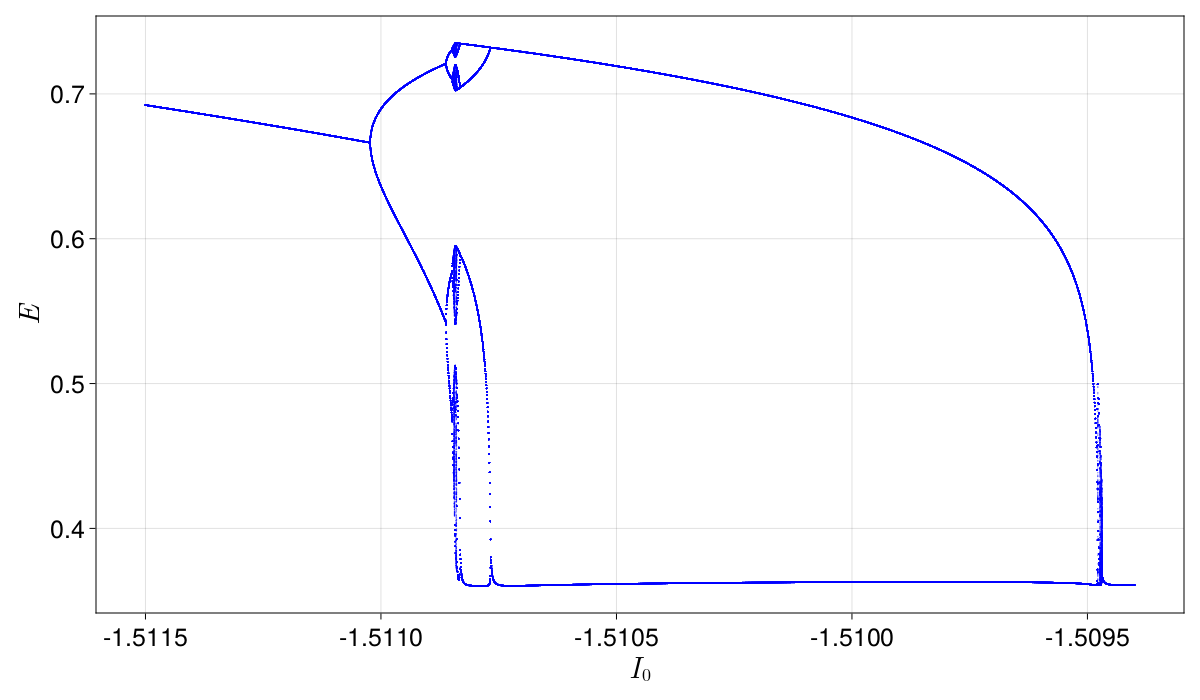

In [170]:
f = Figure(resolution = (1200, 700))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("blue", 0.5), markersize = 2.0)
end
f

In [168]:
save("E_many_plots.jld", "data", output)